In [12]:
import requests
response = requests.get('https://cckpapi.worldbank.org/api/v1/era5-x0.25_timeseries_tas,pr,tx84rr_timeseries_monthly_1950-2023_mean_historical_era5_x0.25_mean/UGA?_format=json')
print(response.json())

{'metadata': {'apiVersion': 'v1', 'status': 'success', 'messages': []}, 'data': {'pr': {'UGA': {'1950-01': 108.4, '1950-02': 69.45, '1950-03': 263.11, '1950-04': 278.94, '1950-05': 260.24, '1950-06': 102.59, '1950-07': 104.9, '1950-08': 114.19, '1950-09': 191.13, '1950-10': 177.7, '1950-11': 222.68, '1950-12': 116.71, '1951-01': 97.89, '1951-02': 135.08, '1951-03': 259.58, '1951-04': 277.72, '1951-05': 267.05, '1951-06': 116.07, '1951-07': 72.71, '1951-08': 104.36, '1951-09': 130.18, '1951-10': 269.75, '1951-11': 302.47, '1951-12': 295.38, '1952-01': 95.87, '1952-02': 175.41, '1952-03': 213.07, '1952-04': 312.52, '1952-05': 261.75, '1952-06': 127.29, '1952-07': 99.87, '1952-08': 164.55, '1952-09': 132.75, '1952-10': 150.32, '1952-11': 253.22, '1952-12': 154.03, '1953-01': 199.56, '1953-02': 244.55, '1953-03': 297.79, '1953-04': 301.03, '1953-05': 323.4, '1953-06': 162.41, '1953-07': 116.28, '1953-08': 119.21, '1953-09': 129.17, '1953-10': 233.5, '1953-11': 338.76, '1953-12': 183.71, '1

In [79]:
import pandas as pd
data = pd.read_excel('/Users/jonathankhabusi/Downloads/Producers Direct/datakit-smallholder-farmers-fall-2025/Challenge 1 _Weather Patterns/Jonathan_Khabusi/era5-x0.25_timeseries_tas,pr,tx84rr_timeseries_monthly_1950-2023_mean_historical_era5_x0.25_mean.xlsx', sheet_name='pr_tas_txx')
data['Year'] = pd.to_datetime(data['Time'], format = "%Y-%m").dt.year
data['Month'] = pd.to_datetime(data['Time'], format = "%Y-%m").dt.month
data['Decade'] = (data['Year'] // 10) * 10
print(data.head(5))
print(f"The highest average maximum monthly temperature recorded is {data['txx'].max()} °C which occurred in the year {data.loc[data['txx'].idxmax(), 'Year']}.")
print(f"The highest average mean monthly temperature recorded is {data['tas'].max()} °C which occurred in the year {data.loc[data['tas'].idxmax(), 'Year']}.")


      Time      pr    tas    txx  Year  Month  Decade
0  1950-01  108.40  22.07  29.51  1950      1    1950
1  1950-02   69.45  22.94  30.52  1950      2    1950
2  1950-03  263.11  21.62  30.84  1950      3    1950
3  1950-04  278.94  21.17  27.48  1950      4    1950
4  1950-05  260.24  20.62  26.59  1950      5    1950
The highest average maximum monthly temperature recorded is 35.55 °C which occurred in the year 2005.
The highest average mean monthly temperature recorded is 26.29 °C which occurred in the year 2016.


In [53]:
meandecade = data.groupby('Decade')[['pr', 'tas', 'txx']].mean().round(2).reset_index()
meandecade['percentagechange'] = meandecade['pr'].pct_change() * 100
meandecade

,Decade,pr,tas,txx,percentagechange
0,1950,169.59,21.62,28.41,NaN
1,1960,171.43,21.82,28.92,1.084970
2,1970,164.35,22.06,29.48,-4.129966
3,1980,150.21,22.52,29.64,-8.603590
4,1990,140.15,22.81,29.84,-6.697290
5,2000,123.53,23.07,30.49,-11.858723
6,2010,130.10,23.36,30.67,5.318546
7,2020,124.30,23.56,30.65,-4.458109


In [ ]:
meanannualpr = data.groupby('Year')['pr'].mean().reset_index()
#reset_index() does not modify the original DataFrame; it returns a new DataFrame with the index reset.
meanannualpr.

,Year,pr
0,1950,167.503333
1,1951,194.020000
2,1952,178.387500
3,1953,220.780833
4,1954,141.223333
...,...,...
69,2019,146.792500
70,2020,152.700000
71,2021,103.948333
72,2022,111.763333


Text(0.5, 1.0, 'Mean Annual Precipitation vs Temperature in Uganda (1950 - 2023)')

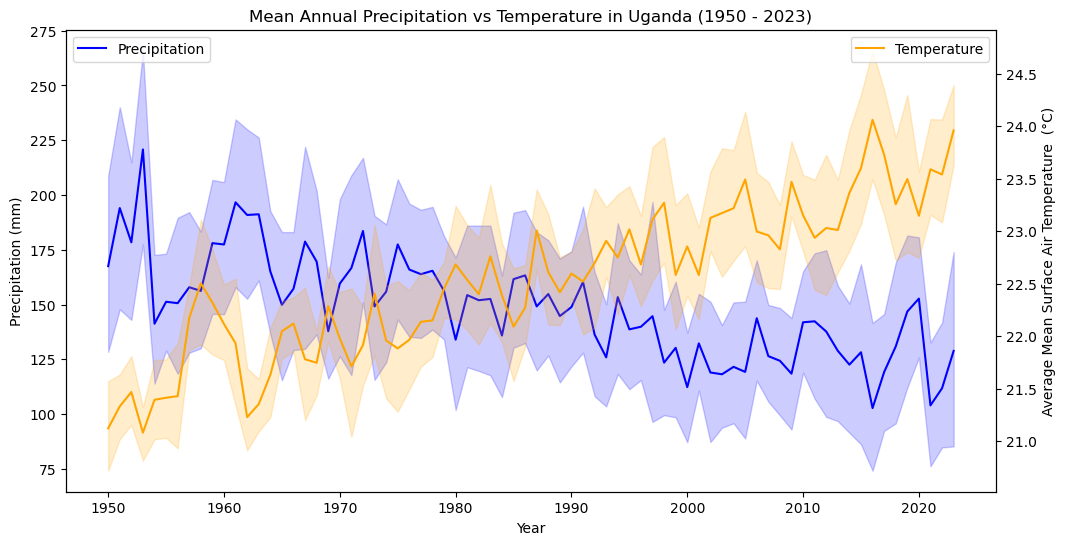

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
sns.lineplot(data=data, x='Year', y='pr', ax=ax1, color='blue', label='Precipitation' )
sns.lineplot(data=data, x='Year', y='tas', color='orange', ax=ax2, label='Temperature')
ax1.set_ylabel('Precipitation (mm)')
ax2.set_ylabel('Average Mean Surface Air Temperature  (°C)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Mean Annual Precipitation vs Temperature in Uganda (1950 - 2023)')


In [ ]:
m2m = data.pivot(index='Year', columns='Month', values='pr')
#reshape the DataFrame so that each month becomes a separate column
m2mdecade = m2m.groupby((m2m.index // 10) * 10).mean().round(2)
#group by decade and calculate the mean for each month
m2mdecade

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1950,116.12,118.40,214.16,256.28,240.62,118.51,119.52,151.83,154.96,183.04,202.27,159.34
1960,89.26,136.63,209.83,224.07,209.56,135.72,133.96,159.93,180.87,223.38,221.95,132.02
1970,95.77,112.29,175.69,237.70,229.59,148.80,139.55,175.96,165.98,192.70,188.98,109.19
1980,69.21,75.40,164.59,216.84,217.45,129.06,136.24,149.32,164.48,188.43,185.34,106.11
1990,81.02,73.74,144.96,207.20,190.35,120.58,116.80,142.98,129.81,191.81,172.62,109.89
2000,67.32,60.04,123.97,184.55,155.83,100.29,103.51,137.62,130.39,164.15,157.16,97.58
2010,42.78,57.80,123.28,199.21,176.80,124.81,108.99,146.82,148.38,185.36,155.94,91.04
2020,59.21,51.30,146.06,193.65,152.34,97.14,84.91,128.19,173.60,156.90,166.98,81.35


/var/folders/2j/gpz1gwjj4n71vcldljdlsr3m0000gn/T/ipykernel_41671/2238178153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march2may['mean'] = march2may.mean(axis=1).round(2)


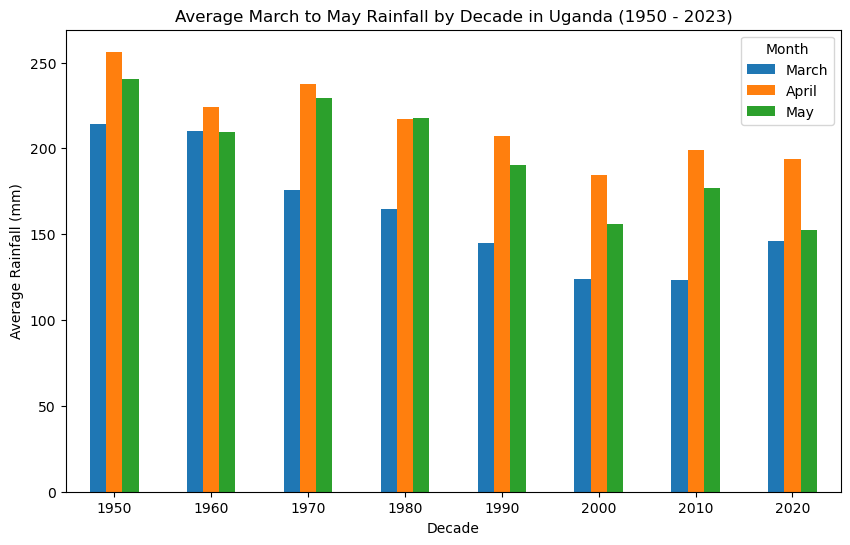

The change in average March to May rainfall per decade from the 1950s to the 2010s is -73.0 mm.


In [109]:
march2may = m2mdecade[[3, 4, 5]]
march2may['mean'] = march2may.mean(axis=1).round(2)
march2may[[3, 4, 5]].plot(kind='bar', figsize=(10, 6), legend=True)
plt.title('Average March to May Rainfall by Decade in Uganda (1950 - 2023)')
plt.xlabel('Decade')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=0)
plt.legend(title='Month', labels=['March', 'April', 'May'])
plt.show()
print(f"The change in average March to May rainfall per decade from the 1950s to the 2010s is {march2may['mean'].iloc[-1] - march2may['mean'].iloc[0]} mm.")


In [100]:
import pymannkendall as mk
result = mk.original_test(data['pr'])
seasonalresult = mk.seasonal_test(data['pr'], period=12)
# Assuming 'result.slope' contains the calculated Sen's slope
monthly_slope = result.slope * 12
#The Sen's slope estimator, representing the magnitude of the trend per time step (in this case, per month
decline_per_decade = monthly_slope * 10
#decline_per_decade converts the monthly slope to a per decade value
print(f"The Sen's slope indicates a decline of {decline_per_decade:.2f} mm per decade in precipitation.")
#:.2f makes the number print with 2 decimal places
print(seasonalresult)

The Sen's slope indicates a decline of -7.91 mm per decade in precipitation.
Seasonal_Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-11.500817020011938, Tau=-0.2634209552017771, s=-8538.0, var_s=551002.0, slope=-0.7812474120082816, intercept=176.38360226880607)


In [133]:
march2may
import numpy as np
#trend analysis for March, April, and May
marchresult = mk.original_test(march2may[3])
aprilresult = mk.original_test(march2may[4])
mayresult, meanresult = mk.original_test(march2may[5]), mk.original_test(march2may['mean'])
monthly_slope_march = marchresult.slope 
monthly_slope_april = aprilresult.slope
monthly_slope_may, meanslope = mayresult.slope, meanresult.slope
print(f"The Sen's slope indicates a decline of {monthly_slope_march:.2f} mm , {monthly_slope_april:.2f} mm, and {monthly_slope_may:.2f} mm per decade in March, April and May precipitation.")
print(f"{marchresult}, \n{aprilresult}, \n{mayresult}, \n{meanresult}")
np.mean([15.26, 9.1185,12.64])




The Sen's slope indicates a decline of -15.26 mm , -9.12 mm, and -12.64 mm per decade in March, April and May precipitation.
Mann_Kendall_Test(trend='decreasing', h=True, p=0.009374768459434968, z=-2.598076211353316, Tau=-0.7857142857142857, s=-22.0, var_s=65.33333333333333, slope=-15.255833333333332, intercept=208.72041666666667), 
Mann_Kendall_Test(trend='decreasing', h=True, p=0.009374768459434968, z=-2.598076211353316, Tau=-0.7857142857142857, s=-22.0, var_s=65.33333333333333, slope=-9.118571428571421, intercept=243.93499999999995), 
Mann_Kendall_Test(trend='decreasing', h=True, p=0.009374768459434968, z=-2.598076211353316, Tau=-0.7857142857142857, s=-22.0, var_s=65.33333333333333, slope=-12.640714285714285, intercept=244.1975), 
Mann_Kendall_Test(trend='decreasing', h=True, p=0.0044340083031007005, z=-2.8455120410060126, Tau=-0.8571428571428571, s=-24.0, var_s=65.33333333333333, slope=-11.280833333333334, intercept=229.71791666666667)


12.339500000000001

            Value
Date             
1950-01-01  22.07
1950-02-01  22.94
1950-03-01  21.62
1950-04-01  21.17
1950-05-01  20.62
1950-06-01  20.55


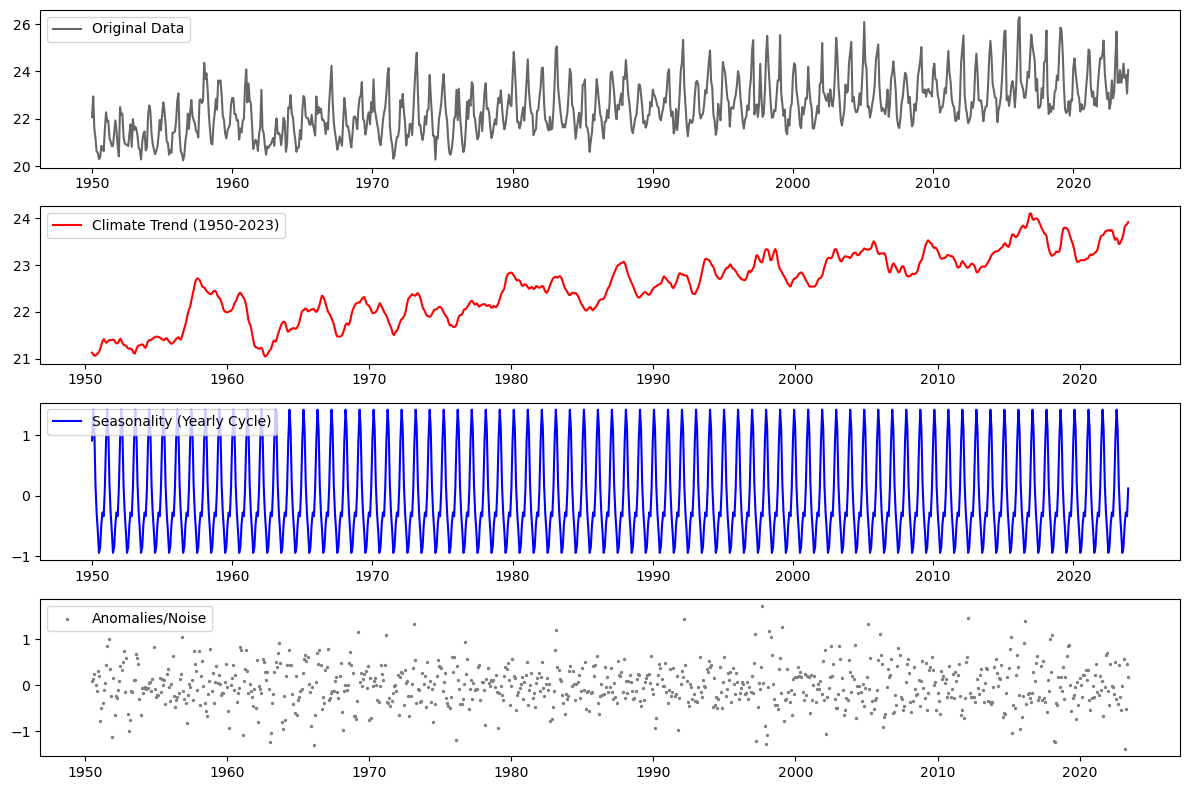

Training SARIMA model... (this may take a moment)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


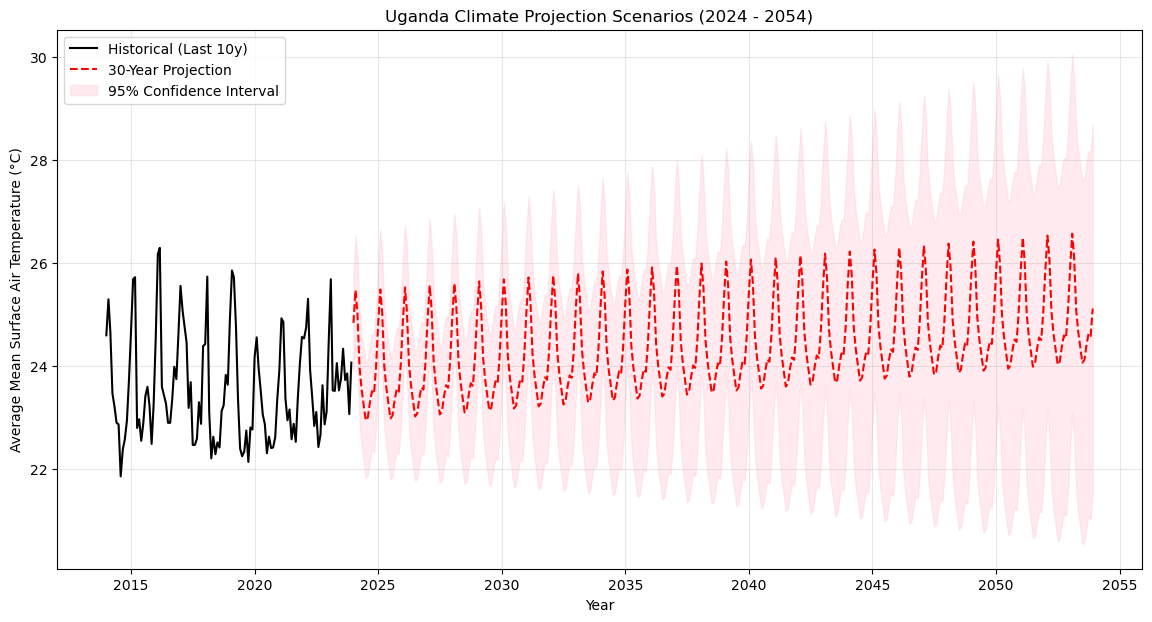

Historical Trend Slope: 0.0302 units per year
Result: Statistically Significant Trend Detected.


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats

# ==========================================
# 1. GENERATE DUMMY DATA (Replace with your Uganda CSV)
# ==========================================
# Simulating 73 years of monthly data (1950-2023)
data['Date'] = pd.to_datetime(data['Time'], format='%Y-%m')
dates = data['Date']
n = len(dates)

# Create a synthetic signal: 
# - Seasonal pattern (e.g., bimodal rainfall or temperature curve)
# - Long-term warming trend (0.02 deg/year)
# - Random noise
seasonality = 5 * np.sin(2 * np.pi * data['Month'] / 12) 
trend = np.linspace(20, 22.5, n) # Warming from 20C to 22.5C
noise = np.random.normal(0, 0.5, n)
datum = seasonality + trend + noise

df = pd.DataFrame({'Date': dates, 'Value': data['tas']})
df.set_index('Date', inplace=True)

print(df.head(6))

# ==========================================
# 2. EXPLORATORY ANALYSIS: DECOMPOSITION
# ==========================================
# We decompose the data to see the underlying Trend vs Seasonality
decomposition = seasonal_decompose(df['Value'], model='additive', period=12)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Value'], label='Original Data', color='black', alpha=0.6)
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Climate Trend (1950-2023)', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality (Yearly Cycle)', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.scatter(df.index, decomposition.resid, label='Anomalies/Noise', color='grey', s=2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# ==========================================
# 3. FORECASTING 30 YEARS (SARIMA)
# ==========================================
# NOTE: In a real study, you must tune order=(p,d,q) and seasonal_order=(P,D,Q,s)
# standard grid search or auto_arima is recommended.
# Here we use a generic config suitable for monthly data.

print("Training SARIMA model... (this may take a moment)")
# Order: (1,1,1) is a standard starting point for trended data
# Seasonal Order: (1,1,1,12) accounts for the 12-month cycle
model = SARIMAX(df['Value'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast next 30 years (360 months)
forecast_steps = 30 * 12
forecast_obj = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05) # 95% confidence interval

# ==========================================
# 4. VISUALIZING THE SCENARIO
# ==========================================
plt.figure(figsize=(14, 7))

# Plot historical data (Last 10 years only for clarity, or full if preferred)
plt.plot(df.index[-120:], df['Value'][-120:], label='Historical (Last 10y)', color='black')

# Plot Forecast
plt.plot(forecast_mean.index, forecast_mean, label='30-Year Projection', color='red', linestyle='--')

# Plot Confidence Intervals (The "Cone of Uncertainty")
plt.fill_between(forecast_mean.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('Uganda Climate Projection Scenarios (2024 - 2054)')
plt.xlabel('Year')
plt.ylabel('Average Mean Surface Air Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================
# 5. STATISTICAL TREND CHECK (Mann-Kendall Proxy)
# ==========================================
# A simple linear regression to quantify the slope
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(df)), df['Value'])
print(f"Historical Trend Slope: {slope*12:.4f} units per year")
if p_value < 0.05:
    print("Result: Statistically Significant Trend Detected.")
else:
    print("Result: No Statistically Significant Trend Detected.")